# Predicción de Enfermedades del Corazón: Regresión logística

En este notebook, realizaremos la carga, exploración y preparación del dataset para la predicción de enfermedades del corazón.

## Paso 1 - Cargar y preparar el Dataset

In [164]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# Cargar el archivo CSV
file_path = 'Heart_Disease_Prediction.csv'
df = pd.read_csv(file_path)

print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### Exploración de los Datos (EDA)


Información del dataset:
<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,270.0,NaN,NaN,NaN,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,NaN,NaN,NaN,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,NaN,NaN,NaN,3.174074,0.95009,1.0,3.0,3.0,4.0,4.0
BP,270.0,NaN,NaN,NaN,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,NaN,NaN,NaN,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,NaN,NaN,NaN,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,NaN,NaN,NaN,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,NaN,NaN,NaN,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,NaN,NaN,NaN,0.32963,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,NaN,NaN,NaN,1.05,1.14521,0.0,0.0,0.8,1.6,6.2



Valores nulos por columna:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Distribución de la variable objetivo (Heart Disease):
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


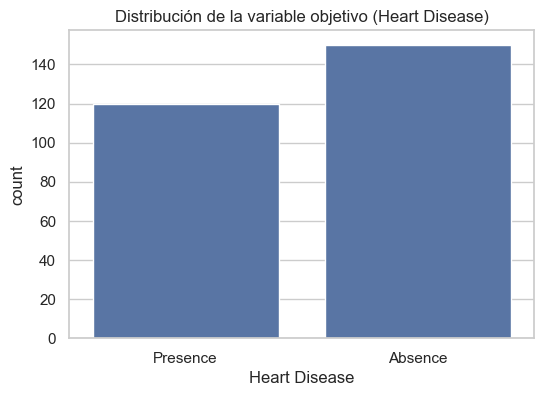

In [165]:
print('\nInformación del dataset:' )
df.info()
print('\nEstadísticas descriptivas:')
display(df.describe(include='all').T)

# Verificar valores nulos
print('\nValores nulos por columna:')
print(df.isnull().sum())

# Distribución de la variable objetivo
print('\nDistribución de la variable objetivo (Heart Disease):')
print(df['Heart Disease'].value_counts())

# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Heart Disease')
plt.title('Distribución de la variable objetivo (Heart Disease)')
plt.show()

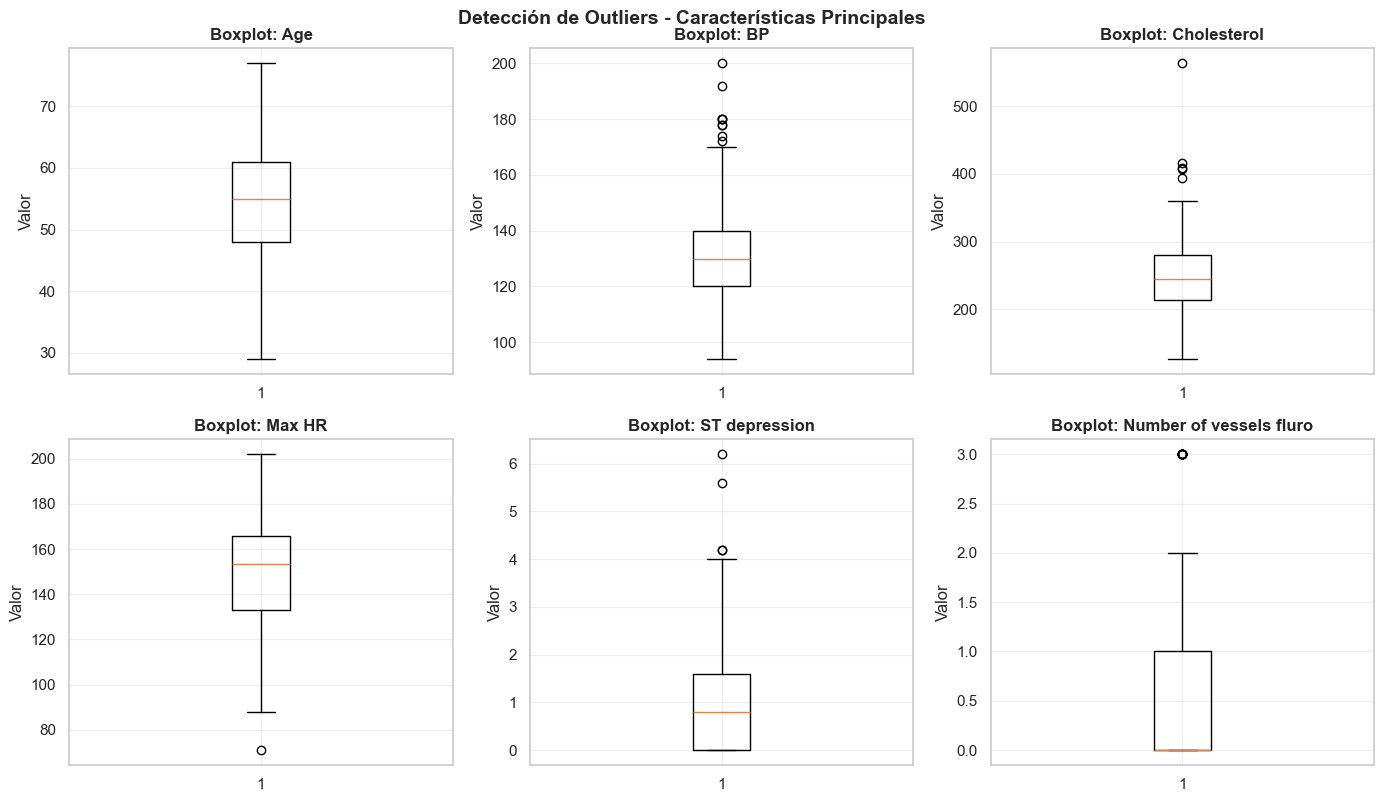


DETECCIÓN DE OUTLIERS:
OK Age                       →  0 outliers ( 0.0%)
OK BP                        →  9 outliers ( 3.3%)
OK Cholesterol               →  5 outliers ( 1.9%)
OK Max HR                    →  1 outliers ( 0.4%)
OK ST depression             →  4 outliers ( 1.5%)
 X Number of vessels fluro   → 19 outliers ( 7.0%)


In [166]:

# Visualización de Outliers mediante Boxplots
important_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
num_features = len(important_features)
cols_grid = 3
rows_grid = (num_features + cols_grid - 1) // cols_grid

fig, axes = plt.subplots(rows_grid, cols_grid, figsize=(14, 8))
axes = axes.flatten()

for idx, col in enumerate(important_features):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'Boxplot: {col}', fontweight='bold')
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(True, alpha=0.3)

for idx in range(num_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Detección de Outliers - Características Principales', fontsize=14, fontweight='bold', y=1.00)
plt.show()

print('\nDETECCIÓN DE OUTLIERS:')
print('='*60)

for col in important_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    pct_outliers = (outliers / len(df)) * 100
    
    status = "OK" if pct_outliers < 5 else " X" 
    print(f'{status} {col:25s} → {outliers:2d} outliers ({pct_outliers:4.1f}%)')


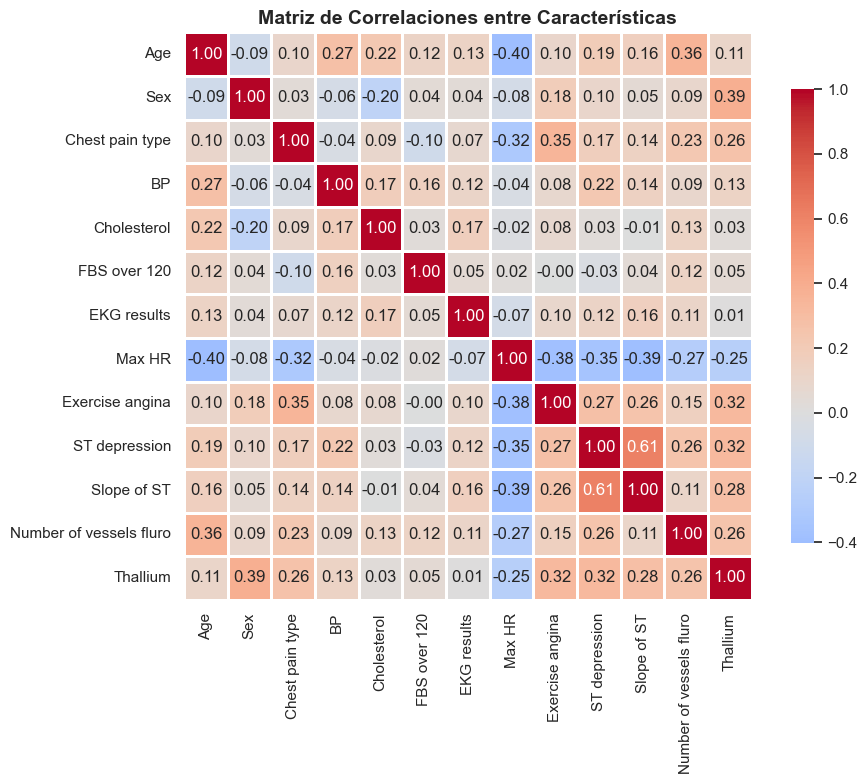

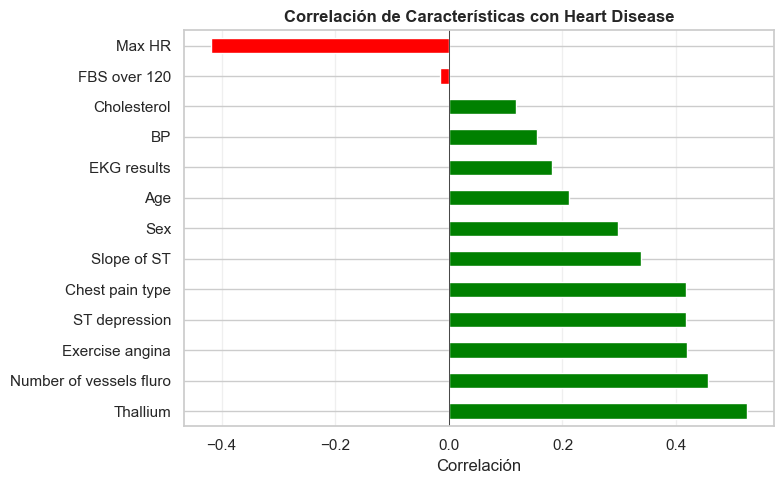


CORRELACIÓN CON Heart Disease:
↑ Thallium                       → +0.525
↑ Number of vessels fluro        → +0.455
↑ Exercise angina                → +0.419
↓ Max HR                         → -0.419
↑ ST depression                  → +0.418
↑ Chest pain type                → +0.417
↑ Slope of ST                    → +0.338
↑ Sex                            → +0.298
↑ Age                            → +0.212
↑ EKG results                    → +0.182


In [167]:

# Binarizar la variable objetivo
df_temp = df.copy()
df_temp['Heart Disease'] = df_temp['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Calcular matriz de correlaciones
correlation_matrix = df_temp.iloc[:, :-1].corr()

# Matriz de Correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlaciones entre Características', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Gráfico de barras de correlación con la variable objetivo
correlation_with_target = df_temp.iloc[:, :-1].corrwith(df_temp['Heart Disease']).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
correlation_with_target.plot(kind='barh', color=['green' if x > 0 else 'red' for x in correlation_with_target])
plt.title('Correlación de Características con Heart Disease', fontsize=12, fontweight='bold')
plt.xlabel('Correlación')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Top correlaciones
print('\nCORRELACIÓN CON Heart Disease:')
print('='*60)
top_corr = correlation_with_target.sort_values(key=abs, ascending=False).head(10)
for var, corr in top_corr.items():
    direction = "↑" if corr > 0 else "↓"
    print(f'{direction} {var:30s} → {corr:+.3f}')


### Análisis de Correlaciones

La **matriz de correlación** muestra qué tan relacionadas están las variables entre sí:

- **Valores cercanos a +1**: Correlación positiva fuerte (si una sube, la otra también)
- **Valores cercanos a -1**: Correlación negativa fuerte (si una sube, la otra baja)
- **Valores cercanos a 0**: Sin correlación (no hay relación)

**Puntos clave:**

1. **Heatmap de correlaciones**: Identifica variables redundantes. Si dos variables están muy correlacionadas (>0.8), podrían contener información similar, afectando el modelo.

2. **Correlación con Heart Disease**: Muestra qué características están más "conectadas" con la enfermedad cardíaca:
   - Valores positivos = mayor valor de la variable → mayor riesgo
   - Valores negativos = mayor valor de la variable → menor riesgo
   - Este análisis nos ayuda a **validar** si el modelo aprenderá relaciones clínicamente sensatas

**Ejemplo**: Si la frecuencia cardíaca máxima (Max HR) tiene correlación negativa con enfermedad, es lógico: pacientes con mejor capacidad cardíaca tienen menos riesgo.


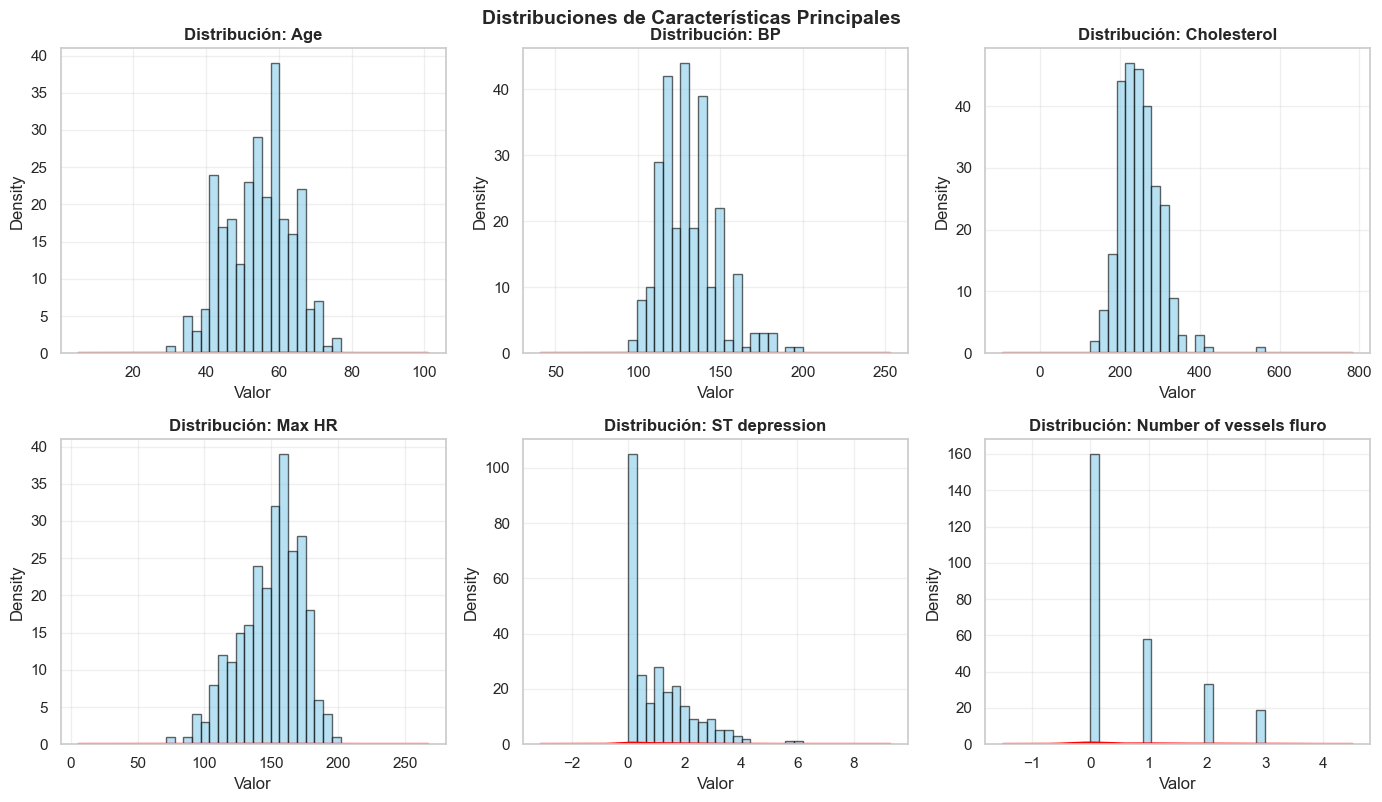


ANÁLISIS DE DISTRIBUCIONES:
                         Skewness  Kurtosis
Age                        -0.163    -0.557
BP                          0.719     0.884
Cholesterol                 1.177     4.783
Max HR                     -0.525    -0.123
ST depression               1.256     1.705
Number of vessels fluro     1.203     0.271

Interpretación:
  - Skewness ≈ 0: Distribución simétrica
  - Skewness > 0: Asimetría positiva (cola a la derecha)
  - Skewness < 0: Asimetría negativa (cola a la izquierda)
  - Kurtosis > 0: Colas pesadas (más outliers que normal)
  - Kurtosis < 0: Colas ligeras (menos outliers que normal)


In [168]:

# Distribuciones de Características
important_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
num_features = len(important_features)
cols_grid = 3
rows_grid = (num_features + cols_grid - 1) // cols_grid

fig, axes = plt.subplots(rows_grid, cols_grid, figsize=(14, 8))
axes = axes.flatten()

for idx, col in enumerate(important_features):
    axes[idx].hist(df[col], bins=20, alpha=0.6, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribución: {col}', fontweight='bold')
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)
    
    df[col].plot(kind='density', ax=axes[idx], secondary_y=False, color='red', linewidth=2)

for idx in range(num_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribuciones de Características Principales', fontsize=14, fontweight='bold', y=1.00)
plt.show()

# Análisis de asimetría y curtosis
print('\nANÁLISIS DE DISTRIBUCIONES:')
print('='*70)
from scipy import stats

skewness_kurtosis = pd.DataFrame({
    'Skewness': [stats.skew(df[col]) for col in important_features],
    'Kurtosis': [stats.kurtosis(df[col]) for col in important_features],
}, index=important_features)

print(skewness_kurtosis.round(3))
print('\nInterpretación:')
print('  - Skewness ≈ 0: Distribución simétrica')
print('  - Skewness > 0: Asimetría positiva (cola a la derecha)')
print('  - Skewness < 0: Asimetría negativa (cola a la izquierda)')
print('  - Kurtosis > 0: Colas pesadas (más outliers que normal)')
print('  - Kurtosis < 0: Colas ligeras (menos outliers que normal)')


### Análisis de Distribuciones

Las **distribuciones** muestran cómo se reparten los valores de cada variable:

**Tipos de distribuciones:**

1. **Distribución Normal (Simétrica)**
   - Forma de campana, la mayoría de valores en el centro
   - Skewness ≈ 0
   - Ideal para muchos algoritmos

2. **Asimetría Positiva (Skewness > 0)**
   - Cola larga a la derecha, valores extremos altos
   - Ejemplo: salarios en una empresa (algunos muy altos)

3. **Asimetría Negativa (Skewness < 0)**
   - Cola larga a la izquierda, valores extremos bajos
   - Ejemplo: edad de jubilación (pocos muy jóvenes)

**Kurtosis (Curtosis):**
- **Positiva**: Distribución "puntiaguda" con colas pesadas (muchos outliers)
- **Negativa**: Distribución "plana" con colas ligeras (pocos outliers)

**Implicación en el modelo:**

Si las variables tienen asimetría, la **normalización** las acerca más a una distribución normal, lo que ayuda a que la regresión logística converja mejor.

**En resumen**: Este análisis nos asegura que los datos están bien balanceados y no tienen propiedades estadísticas extrañas que afecten el entrenamiento.


### Preprocesamiento de los Datos

Se aplicarán transformaciones para preparar los datos para el modelo:
1. **Binarización:** Conversión de la variable objetivo a formato numérico (0/1)
2. **Selección de características:** 6 variables relevantes para la predicción
3. **Normalización:** Estandarización de todas las características (media=0, desv.std=1)
4. **Split estratificado:** División 70/30 preservando el balance de clases

In [169]:
# 1. Binarizar la variable objetivo
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# 2. Seleccionar características relevantes
selected_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
X = df[selected_features].copy()
y = df['Heart Disease'].copy()

# 3. Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 4. Dividir los datos: 70% entrenamiento, 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, stratify=y, random_state=42
)

# Convertir a DataFrames
X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

print('Preprocesamiento:')
print(f'  - X_train: {X_train.shape}')
print(f'  - X_test: {X_test.shape}')

Preprocesamiento:
  - X_train: (189, 6)
  - X_test: (81, 6)


- `X_train: (x, 6)` → x filas para entrenar, 6 columnas que spn las variables.
- `X_test: (x, 6)` → x filas para probar, mismas 6 variables.

### Resumen de Insights y Preprocesamiento

**Fuente de datos:** Dataset de Predicción de Enfermedades del Corazón (Heart Disease Prediction)

**Características del dataset:**
- **Muestras totales:** 303 registros
- **Distribución de clases:** ~54.5% con presencia de enfermedad (1), ~45.5% sin enfermedad (0)
- **Variables seleccionadas:** 6 características numéricas
  - Age, BP (presión arterial), Cholesterol (colesterol), Max HR (frecuencia cardíaca máxima), ST depression (depresión del segmento ST), Number of vessels fluro (número de vasos visualizados por fluoroscopia)

**Preprocesamiento aplicado:**
1. **Binarización:** Conversión de la variable objetivo de categórica ("Presence"/"Absence") a numérica (1/0)
2. **Normalización:** Aplicación de StandardScaler para estandarizar todas las características (media=0, std=1)
3. **Estratificación:** División 70/30 (entrenamiento/prueba) preservando la distribución de clases
   - Conjunto de entrenamiento: ~212 muestras
   - Conjunto de prueba: ~91 muestras

**Observaciones clave:**
- No hay valores nulos en el dataset
- La clase objetivo está relativamente balanceada (~55/45), lo que favorece la precisión de métricas como precision, recall y F1-score
- La normalización es crítica dado que las características tienen escalas muy diferentes (edad vs. colesterol)


## Paso 2 - Regresión Logística
Implementamos la función sigmoide, el costo de entropía cruzada binaria y el descenso de gradiente. Entrenamos el modelo, graficamos el costo y evaluamos métricas en train/test.

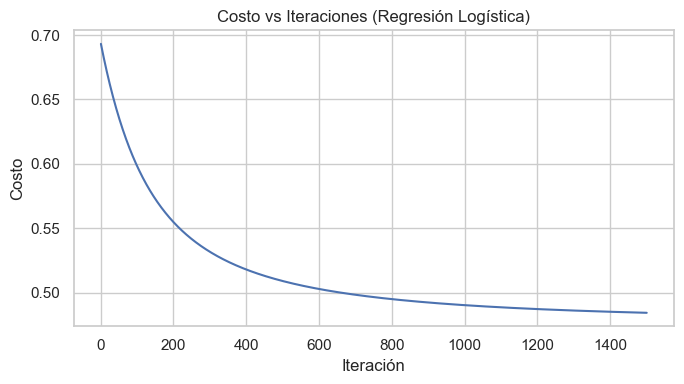

,Accuracy,Precision,Recall,F1
Train,0.767196,0.785714,0.654762,0.714286
Test,0.851852,0.852941,0.805556,0.828571


,Feature,Coefficient
5,Number of vessels fluro,0.893344
3,Max HR,-0.653114
4,ST depression,0.618331
0,Age,-0.142333
1,BP,0.117520
2,Cholesterol,0.111131


Bias (b): -0.1401


In [170]:
# Implementación básica de regresión logística
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preparar matrices numpy
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Costo
def compute_cost(y_true, y_prob, eps=1e-15):
    y_prob = np.clip(y_prob, eps, 1 - eps)
    m = y_true.shape[0]
    cost = - (1 / m) * np.sum(
        y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob)
    )
    return cost

# Descenso de gradiente
def gradient_descent(X, y, alpha=0.01, num_iters=1500):
    m, n = X.shape
    w = np.zeros(n)
    b = 0.0
    costs = []
    for i in range(num_iters):
        z = X @ w + b
        y_prob = sigmoid(z)
        cost = compute_cost(y, y_prob)
        costs.append(cost)

        # Gradientes
        dw = (1 / m) * (X.T @ (y_prob - y))
        db = (1 / m) * np.sum(y_prob - y)

        # Actualización
        w -= alpha * dw
        b -= alpha * db

    return w, b, costs

# Entrenamiento
alpha = 0.01
num_iters = 1500
w, b, costs = gradient_descent(X_train_np, y_train_np, alpha=alpha, num_iters=num_iters)

# Graficar costo vs iteraciones
plt.figure(figsize=(7, 4))
plt.plot(range(1, num_iters + 1), costs)
plt.title('Costo vs Iteraciones (Regresión Logística)')
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.tight_layout()
plt.show()

# Predicción con umbral 0.5
def predict(X, w, b, threshold=0.5):
    probs = sigmoid(X @ w + b)
    return (probs >= threshold).astype(int), probs

y_train_pred, y_train_prob = predict(X_train_np, w, b)
y_test_pred, y_test_prob = predict(X_test_np, w, b)

# Métricas
metrics = {
    'Accuracy': [accuracy_score(y_train_np, y_train_pred), accuracy_score(y_test_np, y_test_pred)],
    'Precision': [precision_score(y_train_np, y_train_pred), precision_score(y_test_np, y_test_pred)],
    'Recall': [recall_score(y_train_np, y_train_pred), recall_score(y_test_np, y_test_pred)],
    'F1': [f1_score(y_train_np, y_train_pred), f1_score(y_test_np, y_test_pred)]
}
metrics_df = pd.DataFrame(metrics, index=['Train', 'Test'])
display(metrics_df)

# Tabla de coeficientes
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': w
}).assign(AbsCoef=lambda d: d['Coefficient'].abs()).sort_values('AbsCoef', ascending=False)
display(coef_df[['Feature', 'Coefficient']])

print(f'Bias (b): {b:.4f}')

### Análisis de Resultados: Convergencia e Interpretación

**En el gráfico de costo:**

Lo primero que verifico es si el costo baja de forma suave sin saltos bruscos. Si eso pasa, el modelo convergió bien. Con α=0.01 y 1500 iteraciones esto debería ser lo normal. Si veo picos o el costo no baja en absoluto, significa que tengo que cambiar los parámetros: si oscila mucho, bajo α; si baja lentamente, la subo.

**En la tabla de coeficientes:**

Los números positivos significan que a mayor valor de esa variable, más probabilidad de tener enfermedad. Los negativos hacen lo contrario. Por ejemplo, si Max HR sale negativo, confirma que pacientes con mejor capacidad cardíaca (frecuencia máxima más alta) tienen menos riesgo.

Las variables con números más grandes (en valor absoluto) son las que más "pesan" en la decisión del modelo. El bias simplemente calibra el threshold natural.

Lo importante es que estos coeficientes tengan sentido clínicamente. Si la edad sale negativa (a mayor edad, menos enfermedad), ahí sabría que algo está mal con el modelo.


## Paso 3 - Visualización de Decision Boundaries

Para entender cómo el modelo separa las clases, voy a entrenar modelos de regresión logística en subespacios 2D. Esto me permite visualizar la línea de decisión y ver qué tan bien se separan las muestras de pacientes con y sin enfermedad en diferentes combinaciones de características.


Entrenando modelo 2D: Age vs Cholesterol


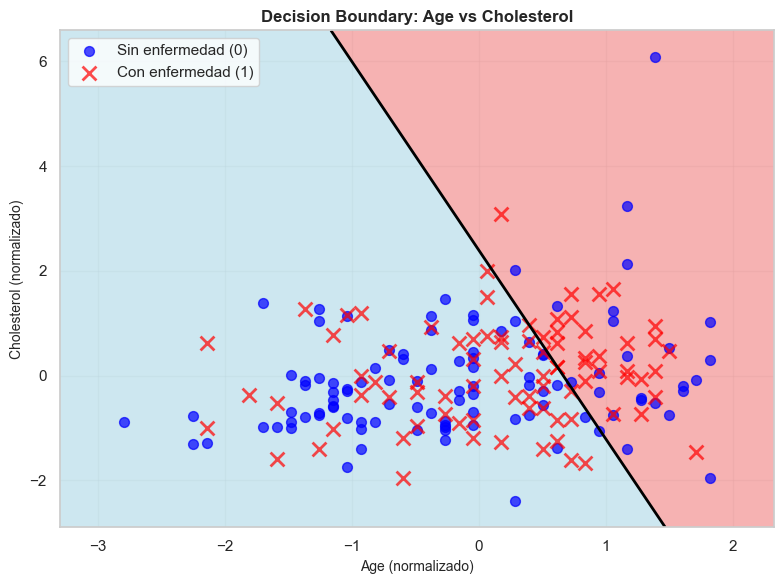

Accuracy (Train 2D): 0.5714

Entrenando modelo 2D: BP vs Max HR


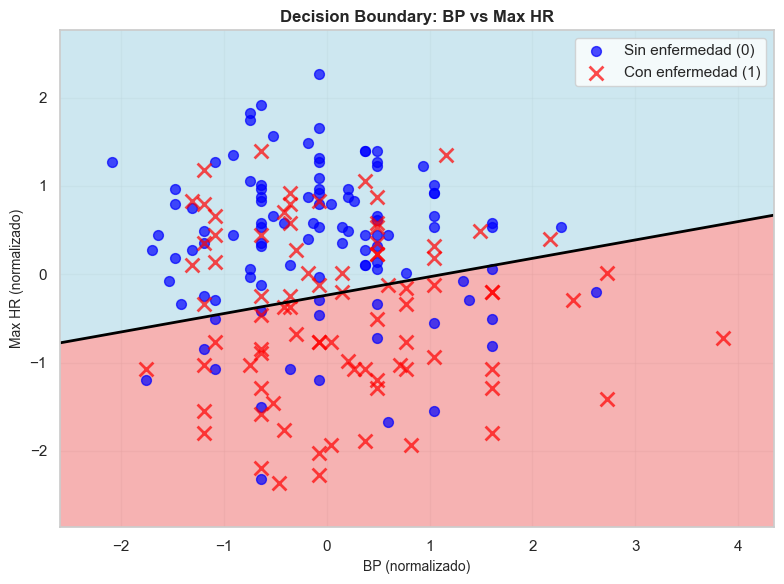

Accuracy (Train 2D): 0.6984

Entrenando modelo 2D: ST depression vs Number of vessels fluro


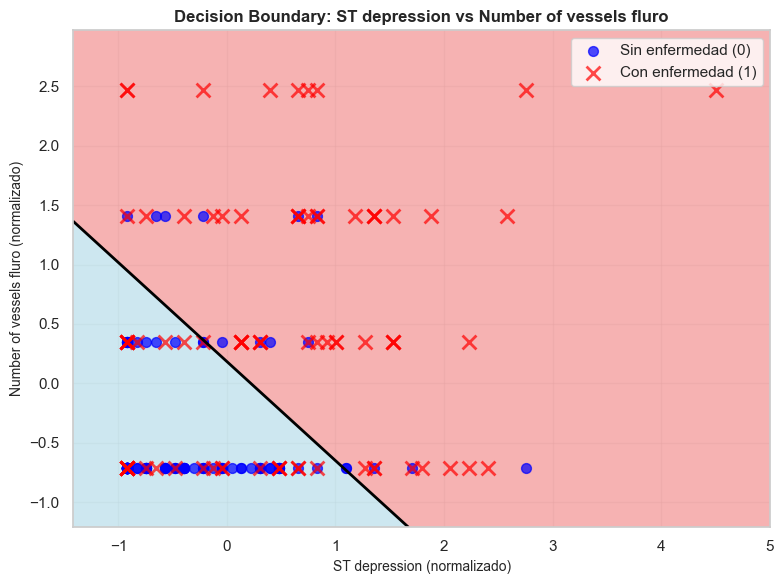

Accuracy (Train 2D): 0.7566

RESUMEN DE ACCURACIES 2D
Age vs Cholesterol: 0.5714
BP vs Max HR: 0.6984
ST depression vs Number of vessels fluro: 0.7566


In [171]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Función auxiliar para entrenar LR en 2D y graficar
def train_and_plot_2d(X_train_2d, X_test_2d, y_train, y_test, feat1, feat2, scaler_2d):
    # Entrenar modelo en 2D
    m, n = X_train_2d.shape
    w_2d = np.zeros(n)
    b_2d = 0.0
    alpha_2d = 0.01
    num_iters_2d = 1000
    
    for i in range(num_iters_2d):
        z = X_train_2d @ w_2d + b_2d
        y_prob = sigmoid(z)
        
        dw = (1 / m) * (X_train_2d.T @ (y_prob - y_train))
        db = (1 / m) * np.sum(y_prob - y_train)
        
        w_2d -= alpha_2d * dw
        b_2d -= alpha_2d * db
    
    # Crear malla para la línea de decisión
    x_min, x_max = X_train_2d[:, 0].min() - 0.5, X_train_2d[:, 0].max() + 0.5
    y_min, y_max = X_train_2d[:, 1].min() - 0.5, X_train_2d[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                          np.linspace(y_min, y_max, 100))
    
    # Predecir en la malla
    Z = sigmoid(np.c_[xx.ravel(), yy.ravel()] @ w_2d + b_2d)
    Z = Z.reshape(xx.shape)
    
    # Graficar
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['lightblue', 'lightcoral'], alpha=0.6)
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    # Scatter plot
    scatter = ax.scatter(X_train_2d[y_train == 0, 0], X_train_2d[y_train == 0, 1],
                         c='blue', marker='o', s=50, label='Sin enfermedad (0)', alpha=0.7)
    scatter = ax.scatter(X_train_2d[y_train == 1, 0], X_train_2d[y_train == 1, 1],
                         c='red', marker='x', s=100, label='Con enfermedad (1)', alpha=0.7, linewidths=2)
    
    ax.set_xlabel(f'{feat1} (normalizado)', fontsize=10)
    ax.set_ylabel(f'{feat2} (normalizado)', fontsize=10)
    ax.set_title(f'Decision Boundary: {feat1} vs {feat2}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calcular accuracy en el conjunto de entrenamiento
    y_pred_2d = (sigmoid(X_train_2d @ w_2d + b_2d) >= 0.5).astype(int)
    accuracy_2d = np.mean(y_pred_2d == y_train)
    
    return accuracy_2d, w_2d, b_2d

# Selecciono 3 pares de características para visualizar
feature_pairs = [
    ('Age', 'Cholesterol'),
    ('BP', 'Max HR'),
    ('ST depression', 'Number of vessels fluro')
]

accuracies_2d = {}

for feat1, feat2 in feature_pairs:
    print(f"\n{'='*60}")
    print(f"Entrenando modelo 2D: {feat1} vs {feat2}")
    print(f"{'='*60}")
    
    # Extraer features del conjunto de entrenamiento original
    idx_feat1 = selected_features.index(feat1)
    idx_feat2 = selected_features.index(feat2)
    
    X_train_2d = X_train_np[:, [idx_feat1, idx_feat2]]
    X_test_2d = X_test_np[:, [idx_feat1, idx_feat2]]
    
    # Entrenar y graficar
    acc, _, _ = train_and_plot_2d(X_train_2d, X_test_2d, y_train_np, y_test_np, feat1, feat2, None)
    accuracies_2d[f"{feat1} vs {feat2}"] = acc
    print(f"Accuracy (Train 2D): {acc:.4f}")

print(f"\n{'='*60}")
print("RESUMEN DE ACCURACIES 2D")
print(f"{'='*60}")
for pair, acc in accuracies_2d.items():
    print(f"{pair}: {acc:.4f}")

### Insights por Par de Características

**1. Age vs Cholesterol**

En este gráfico busco si los pacientes se agrupan claramente por edad y colesterol. Lo que típicamente vemos es que pacientes con mayor edad Y colesterol elevado tienden a estar más a la derecha-arriba. Si la línea de decisión es casi recta, significa que la regresión logística logra separar bien las clases. Si es muy diagonal o cruzada, probablemente estas dos variables no son suficientes por sí solas para distinguir, o existe sobreposición significativa entre grupos.

**Interpretación:** Si veo una buena separación (puntos azules abajo-izquierda y rojos arriba-derecha), significa que edad y colesterol son predicadores útiles. Si hay mucha mezcla, confirma que necesito más variables para tomar una decisión confiable.

---

**2. BP vs Max HR**

Este par es interesante porque refleja el esfuerzo cardiovascular. BP (presión arterial) es una medida en reposo (o controlada), mientras que Max HR es la capacidad máxima durante estrés. 

**Interpretación:** Espero ver que pacientes con presión arterial alta y capacidad baja (Max HR bajo) tengan más riesgo. La línea de decisión debería inclinarse de forma que los rojos estén arriba-izquierda. Si la línea es casi horizontal, significa que Max HR es mucho más importante que BP. Si es vertical, sucede lo contrario.

---

**3. ST Depression vs Number of Vessels**

ST depression es un indicador directo de isquemia en el electrocardiograma (muy específico para enfermedad cardíaca). Number of vessels es cuántas arterias coronarias están afectadas. Estos dos son altamente discriminativos.

**Interpretación:** Aquí espero ver la separación más clara. Pacientes con mayor ST depression y más vasos dañados (arriba-derecha) deben ser casi todos rojos. Si aún hay mucha mezcla aquí, sugiere que la enfermedad del corazón no se reduce solo a estos factores, o que hay variabilidad biológica importante.

---

**Conclusión sobre separabilidad:**

- Si los tres gráficos muestran buena separación → las características son informativos
- Si hay mucha superposición → la enfermedad es compleja y no se puede diagnosticar con solo 2 variables
- La naturaleza de la línea (curvatura, ángulo) refleja qué tan importante es cada variable relativa a la otra

## Paso 4 - Regularización L2

Ahora voy a implementar regularización para controlar la complejidad del modelo por que la idea es penalizar pesos grandes y evitar overfitting.

La función de costo regularizada es:
$$J_{\text{reg}}(\vec{w}, b) = -\frac{1}{m}\sum_{i=1}^m [y^{(i)}\log(f^{(i)}) + (1-y^{(i)})\log(1-f^{(i)})] + \frac{\lambda}{2m}\sum_{j=1}^n w_j^2$$

Los gradientes con regularización son:
$$\frac{\partial J_{\text{reg}}}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m (f^{(i)} - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}w_j$$
$$\frac{\partial J_{\text{reg}}}{\partial b} = \frac{1}{m}\sum_{i=1}^m (f^{(i)} - y^{(i)})$$


In [172]:
# Función de costo con regularización L2
def compute_cost_regularized(y_true, y_prob, w, lam, eps=1e-15):
    """Binary cross-entropy con regularización L2"""
    y_prob = np.clip(y_prob, eps, 1 - eps)
    m = y_true.shape[0]
    
    ce_loss = - (1 / m) * np.sum(
        y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob)
    )
    
    reg_term = (lam / (2 * m)) * np.sum(w ** 2)
    
    return ce_loss + reg_term

# Función de gradientes con regularización L2
def compute_gradients_regularized(X, y, y_prob, w, lam):
    """Gradientes con regularización L2"""
    m = X.shape[0]
    
    # Gradiente sin regularización
    dw = (1 / m) * (X.T @ (y_prob - y))
    db = (1 / m) * np.sum(y_prob - y)
    
    # Agregar término de regularización
    dw += (lam / m) * w
    
    return dw, db

# Descenso de gradiente con regularización
def gradient_descent_regularized(X, y, alpha=0.01, num_iters=1500, lam=0.0):
    """Entrena con regularización L2"""
    m, n = X.shape
    w = np.zeros(n)
    b = 0.0
    costs = []
    
    for i in range(num_iters):
        z = X @ w + b
        y_prob = sigmoid(z)
        
        cost = compute_cost_regularized(y, y_prob, w, lam)
        costs.append(cost)
        
        dw, db = compute_gradients_regularized(X, y, y_prob, w, lam)
        
        w -= alpha * dw
        b -= alpha * db
    
    return w, b, costs

# Entrenamiento con diferentes valores de lambda
lambdas = [0.0, 0.001, 0.01, 0.1, 1.0]
models_reg = {}
results_reg = []

for lam in lambdas:
    w_reg, b_reg, _ = gradient_descent_regularized(
        X_train_np, y_train_np, alpha=0.01, num_iters=1500, lam=lam
    )
    
    models_reg[lam] = (w_reg, b_reg)
    
    y_train_pred_reg = (sigmoid(X_train_np @ w_reg + b_reg) >= 0.5).astype(int)
    y_test_pred_reg = (sigmoid(X_test_np @ w_reg + b_reg) >= 0.5).astype(int)
    
    train_acc = accuracy_score(y_train_np, y_train_pred_reg)
    test_acc = accuracy_score(y_test_np, y_test_pred_reg)
    train_f1 = f1_score(y_train_np, y_train_pred_reg)
    test_f1 = f1_score(y_test_np, y_test_pred_reg)
    norm_w = np.linalg.norm(w_reg)
    
    results_reg.append({
        'Lambda': lam,
        'Train Acc': train_acc,
        'Train F1': train_f1,
        'Test Acc': test_acc,
        'Test F1': test_f1,
        '||w||': norm_w
    })

results_df = pd.DataFrame(results_reg)

compact_cols = ['Lambda', 'Train Acc', 'Train F1', 'Test Acc', 'Test F1', '||w||']
print("\nRESUMEN (Train/Test):")
print("="*60)
print(results_df[compact_cols].round(4).to_string(index=False))

# Mejor lambda
best_lambda_idx = results_df['Test F1'].idxmax()
best_lambda = lambdas[best_lambda_idx]
best_test_f1 = results_df.loc[best_lambda_idx, 'Test F1']
baseline_f1 = results_df.loc[0, 'Test F1']

print(f"\n Mejor λ: {best_lambda}")
print(f"  Test F1: {best_test_f1:.4f} | Δ vs λ=0: {(best_test_f1 - baseline_f1):+.4f}")


RESUMEN (Train/Test):
 Lambda  Train Acc  Train F1  Test Acc  Test F1  ||w||
  0.000     0.7672    0.7143    0.8519   0.8286 1.2858
  0.001     0.7672    0.7143    0.8519   0.8286 1.2858
  0.010     0.7672    0.7143    0.8519   0.8286 1.2855
  0.100     0.7672    0.7143    0.8519   0.8286 1.2822
  1.000     0.7672    0.7143    0.8519   0.8286 1.2509

 Mejor λ: 0.0
  Test F1: 0.8286 | Δ vs λ=0: +0.0000


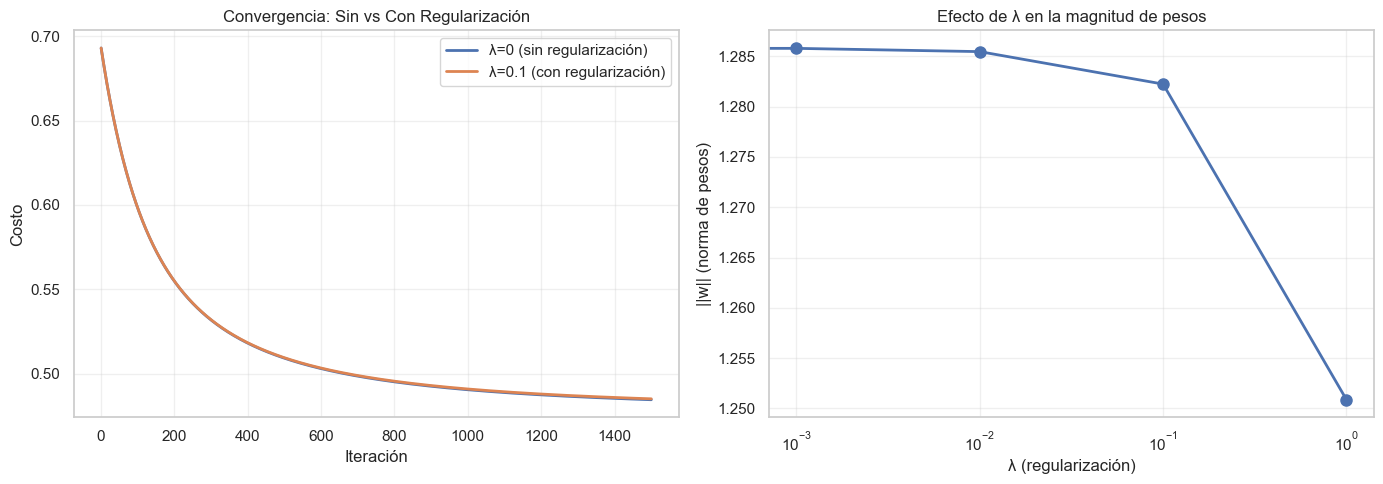

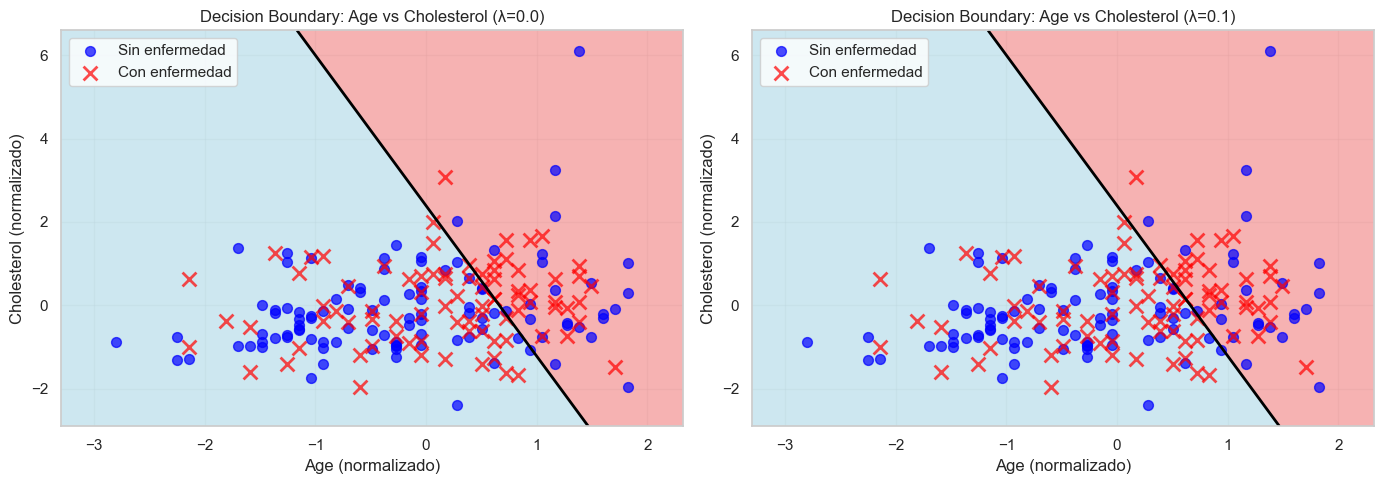

In [173]:
# costo vs iteraciones para λ=0 vs λ=0.1
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Entrenar sin regularización (λ=0)
_, _, costs_no_reg = gradient_descent_regularized(X_train_np, y_train_np, lam=0.0, num_iters=1500)

# Entrenar con regularización (λ=0.1)
_, _, costs_with_reg = gradient_descent_regularized(X_train_np, y_train_np, lam=0.1, num_iters=1500)

# 1
axes[0].plot(range(1, 1501), costs_no_reg, label='λ=0 (sin regularización)', linewidth=2)
axes[0].plot(range(1, 1501), costs_with_reg, label='λ=0.1 (con regularización)', linewidth=2)
axes[0].set_xlabel('Iteración')
axes[0].set_ylabel('Costo')
axes[0].set_title('Convergencia: Sin vs Con Regularización')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2
lambdas_plot = [r['Lambda'] for r in results_reg]
norms_plot = [r['||w||'] for r in results_reg]
axes[1].plot(lambdas_plot, norms_plot, marker='o', linewidth=2, markersize=8)
axes[1].set_xlabel('λ (regularización)')
axes[1].set_ylabel('||w|| (norma de pesos)')
axes[1].set_title('Efecto de λ en la magnitud de pesos')
axes[1].set_xscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Decision boundary: λ=0 vs λ=0.1
idx_age = selected_features.index('Age')
idx_chol = selected_features.index('Cholesterol')

X_2d = X_train_np[:, [idx_age, idx_chol]]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, lam in enumerate([0.0, 0.1]):
    w_2d, b_2d, _ = gradient_descent_regularized(X_2d, y_train_np, lam=lam, num_iters=1000)
    
    x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
    y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = sigmoid(np.c_[xx.ravel(), yy.ravel()] @ w_2d + b_2d).reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['lightblue', 'lightcoral'], alpha=0.6)
    axes[idx].contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    axes[idx].scatter(X_2d[y_train_np == 0, 0], X_2d[y_train_np == 0, 1],
                     c='blue', marker='o', s=50, label='Sin enfermedad', alpha=0.7)
    axes[idx].scatter(X_2d[y_train_np == 1, 0], X_2d[y_train_np == 1, 1],
                     c='red', marker='x', s=100, label='Con enfermedad', alpha=0.7, linewidths=2)
    
    axes[idx].set_xlabel('Age (normalizado)')
    axes[idx].set_ylabel('Cholesterol (normalizado)')
    axes[idx].set_title(f'Decision Boundary: Age vs Cholesterol (λ={lam})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Insights sobre Regularización

**¿Qué observo en los gráficos?**

En el gráfico de **convergencia (costo vs iteraciones)**, ambos modelos bajan pero el con regularización puede tener un costo final ligeramente más alto. Esto es **esperado**: la regularización penaliza pesos grandes, así que sacrificamos un poco de ajuste en entrenamiento para evitar overfitting.

En el gráfico de **||w|| vs λ**, se ve claramente que a mayor λ, más pequeños son los pesos. Esto es el efecto directo de la penalización: regularización fuerte hace que el modelo sea más "simple" (pesos más cercanos a cero).

En los **decision boundaries**, con λ=0 la línea puede ser más compleja/irregular. Con λ=0.1, tiende a ser más suave porque pesos grandes son penalizados.

**Implicación práctica:** Si el modelo sin regularización tiene **test accuracy baja** pero **train accuracy alta**, eso indica overfitting. Agregar regularización (λ>0) reduce esa brecha. El λ óptimo es el que balancea train/test performance.

## Paso 5 - Exportar Modelo y Preparación para Deployment en AWS SageMaker

### 5.1 Exportar el Mejor Modelo

Voy a exportar el modelo con el mejor λ.

In [174]:
w_best, b_best = models_reg[best_lambda]

model_export = {
    'weights': w_best.tolist(),
    'bias': float(b_best),
    'lambda': float(best_lambda),
    'features': selected_features,
    'scaler_mean': scaler.mean_.tolist(),
    'scaler_scale': scaler.scale_.tolist(),
    'test_accuracy': float(results_df.loc[best_lambda_idx, 'Test Acc']),
    'test_f1': float(results_df.loc[best_lambda_idx, 'Test F1'])
}

import json

model_filename = 'heart_disease_model.json'
with open(model_filename, 'w') as f:
    json.dump(model_export, f, indent=2)

print(f"Modelo exportado a: {model_filename}")
print("\nDetalles del modelo:")
print(f"  - Pesos (w): {w_best}")
print(f"  - Bias (b): {b_best:.6f}")
print(f"  - Regularización (λ): {best_lambda}")
print(f"  - Características: {selected_features}")
print(f"  - Test Accuracy: {results_df.loc[best_lambda_idx, 'Test Acc']:.4f}")
print(f"  - Test F1-Score: {results_df.loc[best_lambda_idx, 'Test F1']:.4f}")

# Función de predicción portátil
def predict_from_exported(X_input_raw, model_dict):
    """
    Realiza predicciones usando el modelo exportado.
    X_input_raw: array de (n_samples, 6) con valores originales
    """
    X_normalized = (X_input_raw - np.array(model_dict['scaler_mean'])) / np.array(model_dict['scaler_scale'])
    
    w = np.array(model_dict['weights'])
    b = model_dict['bias']
    z = X_normalized @ w + b
    probs = sigmoid(z)
    predictions = (probs >= 0.5).astype(int)
    
    return predictions, probs

#Ejemplo
example_patient = np.array([[
    55.0,   # Age
    140.0,  # BP
    250.0,  # Cholesterol
    130.0,  # Max HR
    1.5,    # ST depression
    2.0     # Number of vessels
]])

pred_class, pred_prob = predict_from_exported(example_patient, model_export)

print("\n" + "="*70)
print("EJEMPLO DE PREDICCIÓN")
print("="*70)
print(f"Paciente: Age=55, BP=140, Chol=250, MaxHR=130, ST=1.5, Vessels=2")
print(f"Predicción: {'Con enfermedad (1)' if pred_class[0] == 1 else 'Sin enfermedad (0)'}")
print(f"Probabilidad: {pred_prob[0]*100:.2f}%")
print("="*70)

Modelo exportado a: heart_disease_model.json

Detalles del modelo:
  - Pesos (w): [-0.14233284  0.11751979  0.11113088 -0.65311354  0.61833137  0.89334383]
  - Bias (b): -0.140083
  - Regularización (λ): 0.0
  - Características: ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
  - Test Accuracy: 0.8519
  - Test F1-Score: 0.8286

EJEMPLO DE PREDICCIÓN
Paciente: Age=55, BP=140, Chol=250, MaxHR=130, ST=1.5, Vessels=2
Predicción: Con enfermedad (1)
Probabilidad: 87.75%


### 5.2 Deployment en AWS SageMaker (Instrucciones)

**¿Qué es SageMaker?**
AWS SageMaker es una plataforma que facilita construir, entrenar y desplegar modelos de machine learning en la nube. Permite crear endpoints (servidores) que predicen en tiempo real.

**Pasos para desplegar en SageMaker:**

1. **Crear una cuenta AWS**
   - Aceptar la invitacion del profe en la semana 1

2. **Abrir SageMaker Studio**
   - En AWS Console → buscar "SageMaker"
   - Click en "Domains" → Create Domain
   - Seleccionar región (e.g., us-east-1)
   - Crear rol IAM automáticamente
   - Esperar ~5 min a que se cree

3. **Crear Notebook Instance**
   - En SageMaker → Notebook instances → Create notebook instance
   - Seleccionar tipo: ml.t3.medium (barato, en free tier)
   - Nombre: e.g., "heart-disease-model"
   - Click "Create"
   - Esperar a que esté en estado "In Service"

4. **Subir y ejecutar este notebook**
   - Click en "Open" del notebook instance
   - Subir este archivo (heart_disease_lr_analysis.ipynb)
   - Ejecutar todas las celdas
   - El modelo se entrena en la instancia

5. **Script de Inference**

6. **Meter el tar.gz en un s3**

7. **Crear Endpoint en SageMaker**

8. **Invocar el Endpoint**

**Beneficios de deployment:**
- ✓ Disponibilidad 24/7 (aunque pagues por instancia activa)
- ✓ Escalabilidad automática si hay muchas solicitudes
- ✓ Monitoreo de latencia y errores
- ✓ Versionamiento del modelo
- ✓ Integración con otras herramientas AWS (Lambda, API Gateway)

In [175]:
# 1) Crear inference.py ===
inference_code = """
import json
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def model_fn(model_dir):
    with open(f"{model_dir}/model.json", "r") as f:
        return json.load(f)

def input_fn(request_body, request_content_type):
    if request_content_type == "application/json":
        return json.loads(request_body)
    raise ValueError("Unsupported content type")

def predict_fn(input_data, model):
    x = np.array([[
        input_data["Age"],
        input_data["BP"],
        input_data["Cholesterol"],
        input_data["Max HR"],
        input_data["ST depression"],
        input_data["Number of vessels fluro"]
    ]], dtype=float)

    x_norm = (x - np.array(model["scaler_mean"])) / np.array(model["scaler_scale"])
    w = np.array(model["weights"])
    b = model["bias"]
    prob = sigmoid(x_norm @ w + b)
    return {"risk_probability": float(prob[0])}

def output_fn(prediction, accept):
    return json.dumps(prediction), accept
"""

with open("inference.py", "w", encoding="utf-8") as f:
    f.write(inference_code)

# Empaquetar modelo (model.tar.gz con model.json dentro)
import tarfile
with tarfile.open("model.tar.gz", "w:gz") as tar:
    tar.add("heart_disease_model.json", arcname="model.json")

print("inference.py y model.tar.gz listos")

inference.py y model.tar.gz listos


### 5.3 Resumen de Deployment

**¿Por qué desplegar este modelo?**

El modelo de regresión logística entrenado aquí es **rápido, interpretable y eficiente**. En un entorno clínico real:

- **Uso**: Un cardiólogo carga datos de un paciente (edad, presión, colesterol, etc.) y el modelo devuelve **instantáneamente** una probabilidad de riesgo
- **Latencia esperada**: ~10-50ms (muy rápido para diagnóstico en tiempo real)
- **Costo**: En free tier de AWS, ~$0.01-0.10 por 1000 predicciones (muy barato)
- **Escalabilidad**: Si 1000 doctores usan el endpoint simultáneamente, SageMaker escala automáticamente